In [47]:
import numpy as np
import pandas as pd

#!/usr/bin/env python


#Usage: a simple implementation of an RFR on toy data



import matplotlib
#matplotlib.use('Agg')
import numpy as np
#from astropy.stats import biweight_scale
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


########################### ADJUSTABLE PARAMETERS ###########################
Nfolds = 10
Ndat = 5000

#############################################################################
 




    
def testAndTrainIndices(test_fold, Nfolds, folds):
    
    print('finding test and train indices...')

    train_folds = np.delete(np.arange(Nfolds), test_fold)

    test_ind   = [i for i in range(len(folds)) if folds[i]==test_fold]
    train_ind  = [i for i in range(len(folds)) if folds[i] in train_folds]

    return test_ind, train_ind


feature_dict_kin = {i:label for i,label in zip(
                range(28),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                'Delta PA',
                  'v_asym',
                  's_asym',
                  'resids',
                  'lambda_r',
                  'epsilon',
                  'A',
                  'A_2',
                  'deltapos',
                  'deltapos2',
                  'nspax','re',
                  'meanvel','varvel','skewvel','kurtvel',
        'meansig','varsig','skewsig','kurtsig','abskewvel','abskewsig','random'))}

feature_dict_img = {i:label for i,label in zip(
                range(15),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}


list_runs=['major_merger_degraded','minor_merger_degraded',
           'fg3_m12_degraded','fg3_m13_degraded','fg1_m13_degraded','fg3_m15_degraded','fg3_m10_degraded']
colors=["#ED303C","#A0EEC0", "#F5634A","#FF9C5B",
        "#FAD089","#86CD82","#254E70"]
names=['Major Merger','Minor Merger','q0.5_fg0.3','q0.333_fg0.3','q0.333_fg0.1','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2']
titles=['Major Merger','Minor Merger','q = 0.5, f$_g$ = 0.3','q = 0.333, f$_g$ = 0.3','q = 0.333, f$_g$ = 0.1',
        'q = 0.2, f$_g$ = 0.3, B/T = 0.2','q = 0.1, f$_g$ = 0.3, B/T = 0.2']
prior_list = [[0.9,0.1],[0.7,0.3],
             [0.9,0.1],[0.9,0.1],[0.9,0.1],
             [0.7,0.3],[0.7,0.3]]
blue='#3B8183'

In [103]:
from sklearn import datasets, linear_model, feature_selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def locate_min(a):
    smallest = min(a)
    return smallest, [index for index, element in enumerate(a) 
                  if smallest == element]


def clean_data(df, cut):
    myr_list = []
    run_list = []
    view_list = []
    reason_list = []
    row_number = []
    value = []
    for j in range(len(df)):
        #print(df[['Image']].values[j][0], df[['class label']].values[j][0],df[['Myr']].values[j][0], df[['Viewpoint']].values[j][0])
        '''if df[['v_asym']].values[j][0]>1:#df[['Myr']].values[i][0]
            myr_list.append(df[['Myr']].values[j][0])
            view_list.append(df[['Viewpoint']].values[j][0])
            run_list.append(df[['Image']].values[j][0])
            reason_list.append('v_asym')
            value.append(df[['v_asym']].values[j][0])
        if df[['A_2']].values[j][0]>80:#df[['Myr']].values[i][0]
            myr_list.append(df[['Myr']].values[j][0])
            view_list.append(df[['Viewpoint']].values[j][0])
            run_list.append(df[['Image']].values[j][0])
            reason_list.append('A_2')
            value.append(df[['A_2']].values[j][0])
        if df[['skewvel']].values[j][0]>1:#df[['Myr']].values[i][0]
            myr_list.append(df[['Myr']].values[j][0])
            view_list.append(df[['Viewpoint']].values[j][0])
            run_list.append(df[['Image']].values[j][0])
            reason_list.append('skewvel')
            value.append(df[['skewvel']].values[j][0])
        if df[['skewsig']].values[j][0]>4:#df[['Myr']].values[i][0]
            myr_list.append(df[['Myr']].values[j][0])
            view_list.append(df[['Viewpoint']].values[j][0])
            run_list.append(df[['Image']].values[j][0])
            reason_list.append('skewsig')
            row_number.append(j)
            value.append(df[['skewsig']].values[j][0])'''
        if df[['epsilon']].values[j][0]<-0.1:#-0.1:#df[['Myr']].values[i][0]
            myr_list.append(df[['Myr']].values[j][0])
            view_list.append(df[['Viewpoint']].values[j][0])
            run_list.append(df[['Image']].values[j][0])
            reason_list.append('epsilon')
            row_number.append(j)
            value.append(df[['epsilon']].values[j][0])
        
            
            #df.at[j,'class label']=0
    print(run_list, myr_list, view_list, reason_list, row_number, value)
    print('len bf drop', len(df))
    if cut=='yes':
        df_cleaned = df.drop(df.index[row_number])
    else:
        df_cleaned = df
    print('len af drop', len(df_cleaned))
    return df_cleaned, run_list, myr_list, view_list, reason_list, row_number, value
      

def run_diagnostic_plotting(df, features, verbose, name):
    '''First, do a bunch of diagnostic plotting :)'''
    
    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])

    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))
    
    X= df[features].values
    feature_names = ['feature_'+str(i) for i in features]
    feature_names_non = ['feature_'+str(i)+'_non' for i in features]
    for i in range(len(feature_names)):
        feature_names[i] = {key:[] for key in myr}
        feature_names_non[i] = {key:[] for key in myr_non}
    
    color_name_non = {key:[] for key in myr_non}
    color_name = {key:[] for key in myr}
    
    marker_name_non = {key:[] for key in myr_non}
    marker_name = {key:[] for key in myr}
    
    


    epsilon_all=[]
    epsilon_all_non=[]
    vasym_all=[]
    vasym_all_non=[]
    
    for l in range(len(df)):
        
        if df[['class label']].values[l]==0:
            
            epsilon_all_non.append(X[l,5])
            vasym_all_non.append(X[l,1])
            for i in range(len(feature_names_non)):
                feature_names_non[i][df[['Myr']].values[l][0]].append(X[l,i])
            
        else:
            epsilon_all.append(X[l,5])
            vasym_all.append(X[l,1])
            for i in range(len(feature_names)):
                feature_names[i][df[['Myr']].values[l][0]].append(X[l,i])
                
    
    
    
    # Maybe create dictionaries instead
    print(features)
    dict_list = {key:[] for key in features}
    dict_list_non = {key:[] for key in features}
    dict_mean = {key:[] for key in features}
    dict_mean_non = {key:[] for key in features}
    print(dict_list_non)
    
    color_list_all_non = []
    color_list_all = []
    color_means = []
    color_means_non = []
    
       
        
    #dPA_list_all_non, va_list_all_non, sa_list_all_non, resids_list_all_non, lambdar_list_all_non,epsilon_list_all_non,A2_list_all_non,deltapos_list_all_non,deltapos2_list_all_non,color_list_all_non=([] for i in range(10))
    

    #dPA_list_all,va_list_all,sa_list_all,resids_list_all,lambdar_list_all,epsilon_list_all,A2_list_all,deltapos_list_all,deltapos2_list_all,color_list_all=([] for i in range(10))

    #dPA_means_non,va_means_non,sa_means_non,resids_means_non,lambdar_means_non,epsilon_means_non,A2_means_non,deltapos_means_non,deltapos2_means_non,color_means_non=([] for i in range(10))
    
    counter_overall_non=0
    
    for k in range(len(feature_names_non[0])):
        for z in range(len(feature_names_non[0][myr_non[k]])):
            counter_overall_non+=1
            for i in range(len(features)):
                dict_list_non[features[i]].append(feature_names_non[i][myr_non[k]][z])
            
            
            color_list_all_non.append(myr_non[k]/1)
            
        for i in range(len(features)):
            dict_mean_non[features[i]].append(np.mean(feature_names_non[i][myr_non[k]][:]))
        
        
        
        color_means_non.append((myr_non[k]))
    
  
    for k in range(len(feature_names[0])):
        for z in range(len(feature_names[0][myr[k]])):
            for i in range(len(features)):
                dict_list[features[i]].append(feature_names[i][myr[k]][z])
            
            color_list_all.append((myr[k]))
        for i in range(len(features)):
            dict_mean[features[i]].append(np.mean(feature_names[i][myr[k]][:]))    
        
        color_means.append((myr[k]/1))
        

    
    
    
    if verbose=='yes':
        # Make a huge ass histogram diagram that shows merging and nonmerging parameter values for
        # each individual parameter
        # Scatter Plot
        color_list=[]
        print(len(df))
        for j in range(len(df)):
            
            
            #try:
            if df[['class label']].values[j][0]==0:
                color_list.append('#976391')
            else:
                color_list.append('#F7996E')
            '''except:
                print(j, 'missing this value')
                j+=1
                if df['class label'][j]==0:
                    color_list.append('#976391')
                else:
                    color_list.append('#F7996E')'''

                # This means it was deleted from the original array

        for j in range(len(features)):
            k = j*2
            plt.clf()
            

            # Joint Plot
            try:
                jp = sns.jointplot(x=features[k], y=features[k+1], data=df,
                               kind='reg', space=0, size=5, ratio=4,color='k')
            except IndexError:
                break
            jp.ax_joint.cla()
            plt.sca(jp.ax_joint)

            # plt.scatter takes a 'c' keyword for color
            # you can also pass an array of floats and use the 'cmap' keyword to
            # convert them into a colormap
            print(len(df[features[k]]), len(df[features[k+1]]), len(color_list))
            im = plt.scatter(df[features[k]], df[features[k+1]],c=color_list, s=5)
            plt.xlabel(features[k])
            plt.ylabel(features[k+1])
            #plt.legend(im)
            if features[k+1]=='epsilon':
                plt.savefig('inc_'+str(name)+'.png', dpi=500)
            else:
                plt.show()

        # Scatter Plot with Hue for visualizing data in 3-D
        feat_list = features[0:4]
        feat_list.append('class label')
        cols = feat_list
        #['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
        pp = sns.pairplot(df[cols], hue='class label', size=1.8, aspect=1.8, 
                          palette={0: "#97CC04", 1: "#F45D01"},
                          plot_kws=dict(edgecolor="black", linewidth=0.5))
        fig = pp.fig 
        fig.subplots_adjust(top=0.93, wspace=0.3)
        t = fig.suptitle('Galaxy Attributes Pairwise Plots', fontsize=14)
        plt.show()

        feat_list = features[5:9]
        feat_list.append('class label')
        cols = feat_list

        plt.clf()
        #['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
        pp = sns.pairplot(df[cols], hue='class label', size=1.8, aspect=1.8, 
                          palette={0: "#97CC04", 1: "#F45D01"},
                          plot_kws=dict(edgecolor="black", linewidth=0.5))
        fig = pp.fig 
        fig.subplots_adjust(top=0.93, wspace=0.3)
        t = fig.suptitle('Galaxy Attributes Pairwise Plots', fontsize=14)
        plt.show()

        plt.clf()
        feat_list = features[10:14]
        feat_list.append('class label')
        cols = feat_list
        pp = sns.pairplot(df[cols], hue='class label', size=1.8, aspect=1.8, 
                          palette={0: "#97CC04", 1: "#F45D01"},
                          plot_kws=dict(edgecolor="black", linewidth=0.5))
        fig = pp.fig 
        fig.subplots_adjust(top=0.93, wspace=0.3)
        t = fig.suptitle('Galaxy Attributes Pairwise Plots', fontsize=14)
        plt.show()

        feat_list = features[15:19]
        feat_list.append('class label')
        cols = feat_list
        plt.clf()
        pp = sns.pairplot(df[cols], hue='class label', size=1.8, aspect=1.8, 
                          palette={0: "#97CC04", 1: "#F45D01"},
                          plot_kws=dict(edgecolor="black", linewidth=0.5))
        fig = pp.fig 
        fig.subplots_adjust(top=0.93, wspace=0.3)
        t = fig.suptitle('Galaxy Attributes Pairwise Plots', fontsize=14)
        plt.show()



        plt.clf()
        
        plt.scatter(epsilon_all_non, vasym_all_non, color='blue', label='Nonmergers')
        plt.scatter(epsilon_all, vasym_all, color='red', label='Mergers')
        plt.xlabel('$\epsilon$')
        plt.ylabel('$v_{\mathrm{asym}}$')
        #plt.xlim([0,1])
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    return myr, myr_non, color_means, color_means_non, color_list_all, color_list_all_non
    

def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

def run_correlation_analysis(df, features_list):
    corrmat = df.loc[:,features_list[0]:features_list[-1]].corr()
    
    
    print('corrmat',corrmat)
    
    
    
    
    print('most highly corr',mosthighlycorrelated(df.loc[:,features_list[0]:features_list[-1]], 10))
    # Correlation Matrix Heatmap
    f, ax = plt.subplots(figsize=(10, 6))
    hm = sns.heatmap(round(corrmat,1), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                     linewidths=.05)
    f.subplots_adjust(top=0.93)
    t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)
    plt.show()

def run_RFR(df_merg, features_list):
    features = df_merg[features_list].values
    #,'nspax','re'
    Nfeatures = len(features[0])
    
    #dat['features']#.reshape(-1,1)
    labels = df_merg[['class label']].values
    folds = np.arange(len(labels))%Nfolds
    
    
    #Test on fold 0, train on the remaining folds:
    test_ind, train_ind = testAndTrainIndices(test_fold = 0, Nfolds = Nfolds, folds=folds)
    
    #divide features and labels into test and train sets:
    test_features = features[test_ind]
    test_labels   = labels[test_ind]
   
    train_features  = features[train_ind]
    train_labels    = labels[train_ind]

    print('training fold 0')
    #make a random forest model:
    model = RandomForestRegressor(max_depth=10, random_state=42)
    model.fit(train_features, train_labels)

    print('predicting...')
    # Predict on new data
    preds = model.predict(test_features)
    #print out the first few mass predictions to see if they make sense:
    for h in range(10):
        print(test_labels[h], preds[h])


    
    x = np.linspace(min([np.min(test_labels), np.min(preds)]), \
                        max([np.max(test_labels), np.max(preds)]), 100)
    plt.plot(x, x, c='k', ls='--')
    plt.scatter(test_labels, preds, s=3, alpha=0.3)
    plt.xlabel('truth')
    plt.ylabel('prediction')
    plt.show()
    #plt.savefig('rfrscatter.pdf')
    plt.clf()

    # rank feature importance:
    print('ranking feature importances...')
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]

    # Plot the feature importances of the forest
    plt.figure(figsize=(15,5))
    plt.title("Feature importances for "+str(run))
    plt.bar(range(Nfeatures), importances[indices], yerr=std[indices], align="center", color='pink')
    plt.xticks(range(Nfeatures), indices)
    plt.xlim([-1, Nfeatures])
    plt.show()
    
    #plt.savefig('feature_importance_'+str(run)+'_rando.pdf')
    
    
    
    print('Run ', run)
    print('Importance in Order ~~~~')
    
    # find the index of the random one:
    random_idx = features_list.index('random')
    random_value = importances[random_idx]
    print('random idx', random_idx)
    print('random_value', random_value)
    unin_here = []
    important_here = []
    for j in range(len(indices)):
        #if importances[indices[j]] - std[indices[j]] > 0:
        print(indices[j], features_list[indices[j]])
        if importances[indices[j]] < random_value:#importances[indices[j]] < 0.01 or 
            unin_here.append(features_list[indices[j]])
        else:
            important_here.append(features_list[indices[j]])
  
    return important_here, unin_here
    
    
    # Now what? Maybe run the LDA again? assess accuracy? precision, recall
def run_RFC(df_merg, features_list):
    features = df_merg[features_list].values
    #,'nspax','re'
    Nfeatures = len(features[0])
    
    #dat['features']#.reshape(-1,1)
    labels = df_merg[['class label']].values
    folds = np.arange(len(labels))%Nfolds
    
    
    #Test on fold 0, train on the remaining folds:
    test_ind, train_ind = testAndTrainIndices(test_fold = 0, Nfolds = Nfolds, folds=folds)
    
    #divide features and labels into test and train sets:
    test_features = features[test_ind]
    test_labels   = labels[test_ind]
   
    train_features  = features[train_ind]
    train_labels    = labels[train_ind]

    print('training fold 0')
    #make a random forest model:
    model = RandomForestClassifier(max_depth=10, random_state=42)
    model.fit(train_features, train_labels)

    print('predicting...')
    # Predict on new data
    preds = model.predict(test_features)
    #print out the first few mass predictions to see if they make sense:
    for h in range(10):
        print(test_labels[h], preds[h])


    
    x = np.linspace(min([np.min(test_labels), np.min(preds)]), \
                        max([np.max(test_labels), np.max(preds)]), 100)
    plt.plot(x, x, c='k', ls='--')
    plt.scatter(test_labels, preds, s=3, alpha=0.3)
    plt.xlabel('truth')
    plt.ylabel('prediction')
    plt.show()
    #plt.savefig('rfrscatter.pdf')
    plt.clf()

    # rank feature importance:
    print('ranking feature importances...')
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]

    # Plot the feature importances of the forest
    plt.figure(figsize=(15,5))
    plt.title("Feature importances for "+str(run))
    plt.bar(range(Nfeatures), importances[indices], yerr=std[indices], align="center", color='pink')
    plt.xticks(range(Nfeatures), indices)
    plt.xlim([-1, Nfeatures])
    plt.show()
    
    #plt.savefig('feature_importance_'+str(run)+'_rando.pdf')
    
    
    
    print('Run ', run)
    print('Importance in Order ~~~~')
    
    # find the index of the random one:
    random_idx = features_list.index('random')
    random_value = importances[random_idx]
    print('random idx', random_idx)
    print('random_value', random_value)
    unin_here = []
    for j in range(len(indices)):
        #if importances[indices[j]] - std[indices[j]] > 0:
        print(indices[j], features_list[indices[j]])
        if importances[indices[j]] < 0.01 or importances[indices[j]] < random_value:
            unin_here.append(features_list[indices[j]])
    unimportant.append(unin_here)
    # Now what? Maybe run the LDA again? assess accuracy? precision, recall
      

def run_OLS(df, x_list):
    '''Now I would love to run some OLS to find R^2 values etc'''
    
    
    
    
    
    y = df['class label'].values
    
    
    X= df[x_list].values
    #std_scale = preprocessing.StandardScaler().fit(X)
    #X = std_scale.transform(X)

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1
    label_dict = {1: 'Nonmerger', 2: 'Merger'}
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
    #print('len', len(X_train), len(X_test), len(y_train), len(y_test))

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    

    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    return est2.summary()

def run_logit(df, x_list):
    y = df['class label'].values
    X= df[x_list].values
    
    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y)
    try:
        logistic = sm.Logit(y, X).fit()
        return logistic.summary()
    except:
        return 'Singular Matrix'
 

'''def run_LDA_linear(df, priors_list,x_list, myr, myr_non, color_means, color_means_non):
    
    
    
    inputs=x_list
    
    
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    list_std_scale=[]
    list_sklearn=[]
    list_mean_non=[]
    kf_choose=[]
    
    
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        std_scale_this_step=[]
        sklearn_this_step=[]
        mean_non_this_step=[]
        kf_list=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)
            std_scale_this_step.append(std_scale)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            
            
    
            kf.get_n_splits(X, y)
            kf_list.append(kf.split(X,y))



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            mean_non_list=[]
            score=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                
                
                



                sklearn_lda = LDA( solver='svd',priors=priors_list,store_covariance=True)#store_covariance=False
            


                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])
                my_lists_none = []
                my_lists_merg = []


                for f in range(len(X_train)):
                    if y_train[f]==1:
                        my_lists_none.append(X_lda_sklearn[f][0])
                        continue
                    else:
                        my_lists_merg.append(X_lda_sklearn[f][0])
                mean_non_list.append(float((np.mean(my_lists_merg))+float(np.mean(my_lists_none)))/2)

            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            
            mean_non_this_step.append(np.mean(mean_non_list))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
        
        try:
            if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
                break
        except ValueError:
            continue
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        
        kf_choose.append(kf_list[accuracy.index(min(accuracy))])
        
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        
        
        list_std_scale.append(std_scale_this_step[accuracy.index(min(accuracy))])

        
        num_comps.append(len(prev_input))#
        list_sklearn.append(sklearn_this_step[accuracy.index(min(accuracy))])
        
    
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    #Now you need to use one standard error 
    
    
    for m in range(len(missclass)):
        if (missclass[m]) < (min_A+min_A_e):
            print('m',missclass[m],min_A+min_A_e)
            new_min_index=m
            break
        else:
            new_min_index=min_index
            
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    
    splits=kf_choose[new_min_index]
    
    X= df[x_list].values
    
    y = df['class label'].values

    from sklearn import preprocessing

    #print(prev_input)
    
    print(run,'&')
    # There has got to be a better way to write this that involves listing them in order of importance
    inds = abs(list_coef[new_min_index][0]).argsort()
    sortedinput = inputs_all[inds]
    print('sorted inputs', sortedinput)
    print('coeff', list_coef[new_min_index][0][inds])
    print('std', list_coef_std[new_min_index][0][inds])
    
    
    
    
    # We have to figure out how many terms to include
    significant_term = []
    significant_coef = []
    significant_std = []
    for l in range(len(sortedinput)):
        if float(abs(list_coef[new_min_index][0][inds][l]) - 3*list_coef_std[new_min_index][0][inds][l]) > 0:
            #then it is still significant to 3. sigma
            significant_term.append(sortedinput[l])
            significant_coef.append(list_coef[new_min_index][0][inds][l])
            significant_std.append(list_coef_std[new_min_index][0][inds][l])
    # this next section is entirely for the interactive plot:
    if len(significant_term[::-1]) < 1:
        # We have to figure out how many terms to include
        significant_term = []
        significant_coef = []
        significant_std = []
        for l in range(len(sortedinput)):
            if float(abs(list_coef[new_min_index][0][inds][l]) - list_coef_std[new_min_index][0][inds][l]) > 0:
                #then it is still significant to 3. sigma
                significant_term.append(sortedinput[l])
                significant_coef.append(list_coef[new_min_index][0][inds][l])
                significant_std.append(list_coef_std[new_min_index][0][inds][l])
        # this next section is entirely for the interactive plot:
        
    
    
    if len(significant_term) > 1:
   
        X = df[significant_term[::-1]].values
        std_scale = preprocessing.StandardScaler().fit(X)

        X = std_scale.transform(X)

        # These are all the. variables scaled
        # So now go through and. build a bunch of arrays that contain the value of these for all viewpoints?

        input_1 = {key:[] for key in myr}
        input_2 = {key:[] for key in myr}
        
        input_1_non = {key:[] for key in myr_non}
        input_2_non = {key:[] for key in myr_non}
        





        for q in range(len(myr)):
            for r in range(7):
                input_1[myr[q]].append(888)
                input_2[myr[q]].append(888)
               

        for q in range(len(myr_non)):
            for r in range(7):
                input_1_non[myr_non[q]].append(888)
                input_2_non[myr_non[q]].append(888)
                

        all_inputs = [input_1, input_2]
        all_inputs_non = [input_1_non, input_2_non]

        if len(significant_term[::-1]) > 6:
            len_sig = 6
        else:
            len_sig = len(significant_term[::-1])

        for l in range(len(df)):
            if df[['class label']].values[l]==1:
                for i in range(len_sig):
                    all_inputs[i][df[['Myr']].values[l][0]][df[['Viewpoint']].values[l][0]] = (X[l,i])
            else:
                for i in range(len_sig):
                    all_inputs_non[i][df[['Myr']].values[l][0]][df[['Viewpoint']].values[l][0]] = (X[l,i])


        input_1_means=[]
        input_2_means=[]
        

        input_means_list = [input_1_means, input_2_means]
        huge_plot_input = [input_1_means, input_2_means]
        for k in range(len(input_1)):
            input_1_list_all=[]
            input_2_list_all=[]
            
            input_list_all_list = [input_1_list_all,input_2_list_all]
            for z in range(len(all_inputs[0][myr[k]])):
                for i in range(len_sig):
                    input_list_all_list[i].append((all_inputs[i][myr[k]][z]))




            try:
                for i in range(len_sig):
                    input_means_list[i].append(input_list_all_list[i][input_list_all_list[0] != 888].mean())

            except AttributeError:
                for i in range(len_sig):
                    input_means_list[i].append(input_list_all_list[i][input_list_all_list[0] != 888])
            for i in range(len_sig):     
                huge_plot_input[i].append(input_list_all_list[i][input_list_all_list[0] != 888])




        input_1_means_non=[]
        input_2_means_non=[]
        
        input_means_list_non = [input_1_means_non, input_2_means_non]
        huge_plot_input_non = [input_1_means_non, input_2_means_non]

        for k in range(len(input_1_non)):
            input_1_list_all_non=[]
            input_2_list_all_non=[]
            
            input_list_all_list_non = [input_1_list_all_non,input_2_list_all_non]
            for z in range(len(all_inputs_non[0][myr_non[k]])):
                for i in range(len_sig):
                    input_list_all_list_non[i].append((all_inputs_non[i][myr_non[k]][z]))




            try:
                for i in range(len_sig):
                    input_means_list_non[i].append(input_list_all_list_non[i][input_list_all_list_non[0] != 888].mean())

            except AttributeError:
                for i in range(len_sig):
                    input_means_list_non[i].append(input_list_all_list_non[i][input_list_all_list_non[0] != 888])
            for i in range(len_sig):     
                huge_plot_input_non[i].append(input_list_all_list_non[i][input_list_all_list_non[0] != 888])
        # Now unpack em
        input_1_means, input_2_means = input_means_list
        input_1_means_non, input_2_means_non = input_means_list_non

        input_1_all, input_2_all = huge_plot_input
        input_1_all_non, input_2_all_non = huge_plot_input_non
        
        # Make a time evolution plot of the two most important terms
        # And this will be after normalization
        # ['dPA*epsilon', 'Delta PA', 'va*resids', 'epsilon', 's_asym']
        
        
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(111)
        import numpy.ma as ma
        print(ma.masked_where(input_1_means_non > 800, input_1_means_non))
        #spax
        im1=ax1.scatter(ma.masked_where(input_1_means>800, input_1_means), ma.masked_where(input_2_means > 800, input_2_means), c=color_means, cmap='Reds', s=35,edgecolors= "red")
        cb=plt.colorbar(im1,orientation='vertical')
        ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
        cb.ax.tick_params(labelsize=20)

        im2=ax1.scatter(ma.masked_where(input_1_means_non> 800, input_1_means_non), ma.masked_where(input_2_means_non > 800, input_2_means_non), c=color_means_non, cmap='Blues', s=35,edgecolors= "blue")
        cb_1= plt.colorbar(im2, orientation='vertical')
        cb_1.ax.tick_params(labelsize=20)


        ax1.set_xlabel(str(significant_term[-1]), size=20)
        ax1.set_ylabel(str(significant_term[-2]), size=20)
        plt.tick_params(axis='both', which='major', labelsize=20)
        #ax1.set_xlim([-1,1])
        #ax1.set_ylim([-1,1])
        #import os
        #print('os', os.getcwd())
        #os /Users/beckynevin/CfA_Code/Kinematics_SUNRISE/interactive_figs
        plt.show()
        #plt.savefig('../Kin_Figures/time_evo_leading_terms_spax_'+str(run)+'.pdf', bbox_inches="tight"
    
    
    
   
    
    master=list_master[new_min_index]
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)'''
    
def run_LDA_nonlinear(df, priors_list,x_list, myr, myr_non, color_means, color_means_non, color_all, color_all_non, breakpoint):
    
    
    
    input_singular=x_list
    
    
    #Okay so this next part actually needs to be adaptable to reproduce all possible cross-terms
    crossterms = []
    ct_1 = []
    ct_2 = []
    for j in range(len(input_singular)):
        for i in range(len(input_singular)):
            if j == i or i < j:
                continue
            #input_singular.append(input_singular[j]+'*'+input_singular[i])
            crossterms.append(input_singular[j]+'*'+input_singular[i])
            ct_1.append(input_singular[j])
            ct_2.append(input_singular[i])
    
    inputs = input_singular + crossterms
    
    
    def cross_term(row, t1, t2):
        return row[t1]*row[t2]
    #def deltapos_deltapos2(row):
        #return row['deltapos']*row['deltapos2']
    
    # Now you have to construct a bunch of new rows to the df that include all of these cross-terms
    for j in range(len(crossterms)):
        
        df[crossterms[j]] = df.apply(cross_term, axis=1, args=(ct_1[j], ct_2[j]))
        
    
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    kf_choose=[]
    list_std_scale=[]
    list_sklearn=[]
    list_mean_non=[]
    
    
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        std_scale_this_step=[]
        sklearn_this_step=[]
        mean_non_this_step=[]
        kf_list=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            #print('starting input', prev_input,inputs[k])
            #if inputs[k] is a cross term and the prev_input doesn't contain it, add it:
            '''for m in range(len(crossterms)):
                if inputs[k]==crossterms[m]:
                    #then you are going to search every term of prev_input and see if it is there
                    #for n in range(len(prev_input)):
                    if ct_1[m] not in prev_input:
                        prev_input.append(ct_1[m])
                        
                        inputs_here.append(ct_1[m])
                    if ct_2[m] not in prev_input:
                        prev_input.append(ct_2[m])
                        inputs_here.append(ct_2[m])'''
                        
                    
            #print('inputs heading into LDA',prev_input)
            
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)

            std_scale_this_step.append(std_scale)
            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y)


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            
            
    
            kf.get_n_splits(X, y)
            kf_list.append(kf.split(X,y))



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            mean_non_list=[]
            score=[]
            count=0
            iterate = 0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                
                

                sklearn_lda = LDA( solver='svd',priors=priors_list,store_covariance=True)#store_covariance=False
                
                

                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                
                
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])
                my_lists_none = []
                my_lists_merg = []


                
            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
            
        
        try:
            if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
                break
        except ValueError:
            continue
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        
        
        
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        
        
        
        
        
        kf_choose.append(kf_list[accuracy.index(min(accuracy))])
        
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        list_std_scale.append(std_scale_this_step[accuracy.index(min(accuracy))])

        
            
        num_comps.append(len(prev_input))#
        
        # Now check to see if you can break early
        break_yn = 'no'
        for m in range(len(missclass)):
            if (missclass[m]) < (min(accuracy)):#+accuracy_e[accuracy.index(min(accuracy))]
                break_yn = 'yes'
        if break_yn =='yes':
            break
        if len(prev_input) > breakpoint:
            break
    
    
    min_A=min(missclass)
    
    min_comps=num_comps[missclass.index(min(missclass))]
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    '''Now you need to use one standard error '''
    
    
    for m in range(len(missclass)):
        if (missclass[m]) < (min_A+min_A_e):
            print('m',missclass[m],min_A+min_A_e, num_comps[m])
            new_min_index=m
            break
        else:
            new_min_index=min_index
    plt.clf()
    plt.axvline(x = num_comps[new_min_index], color='k')
    plt.axvline(x = num_comps[min_index], color='k')
    plt.plot(num_comps, missclass, color='#97CC04')
    plt.scatter(num_comps, missclass, color='#97CC04')
    plt.errorbar(num_comps, missclass, yerr = missclass_e, color='#97CC04')
    
    plt.xlabel('Number of Components')
    plt.ylabel('Number of Misclassifications')
    plt.show()
    
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    
    splits=kf_choose[new_min_index]
    
    

    #print(prev_input)
    print(run,'&')
    
    # There has got to be a better way to write this that involves listing them in order of importance
    inds = abs(list_coef[new_min_index][0]).argsort()
    sortedinput = inputs_all[inds]
    print('sorted inputs', sortedinput)
    print('coeff', list_coef[new_min_index][0][inds])
    print('std', list_coef_std[new_min_index][0][inds])
    
    
    
    
    # We have to figure out how many terms to include
    significant_term = []
    significant_coef = []
    significant_std = []
    for l in range(len(sortedinput)):
        if float(abs(list_coef[new_min_index][0][inds][l]) - 3*list_coef_std[new_min_index][0][inds][l]) > 0:
            #then it is still significant to 3. sigma
            significant_term.append(sortedinput[l])
            significant_coef.append(list_coef[new_min_index][0][inds][l])
            significant_std.append(list_coef_std[new_min_index][0][inds][l])
    # this next section is entirely for the interactive plot:
    if len(significant_term[::-1]) < 1:
        # We have to figure out how many terms to include
        significant_term = []
        significant_coef = []
        significant_std = []
        for l in range(len(sortedinput)):
            if float(abs(list_coef[new_min_index][0][inds][l]) - list_coef_std[new_min_index][0][inds][l]) > 0:
                #then it is still significant to 3. sigma
                significant_term.append(sortedinput[l])
                significant_coef.append(list_coef[new_min_index][0][inds][l])
                significant_std.append(list_coef_std[new_min_index][0][inds][l])
        # this next section is entirely for the interactive plot:
        
    
    
    
    '''if len(significant_term) > 1:
   
        X = df[significant_term[::-1]].values
        std_scale = preprocessing.StandardScaler().fit(X)

        X = std_scale.transform(X)

        # These are all the. variables scaled
        # So now go through and. build a bunch of arrays that contain the value of these for all viewpoints?

        input_1 = {key:[] for key in myr}
        input_2 = {key:[] for key in myr}
        
        input_1_non = {key:[] for key in myr_non}
        input_2_non = {key:[] for key in myr_non}
        





        for q in range(len(myr)):
            for r in range(7):
                input_1[myr[q]].append(888)
                input_2[myr[q]].append(888)
               

        for q in range(len(myr_non)):
            for r in range(7):
                input_1_non[myr_non[q]].append(888)
                input_2_non[myr_non[q]].append(888)
                

        all_inputs = [input_1, input_2]
        all_inputs_non = [input_1_non, input_2_non]
        #print('shape', np.shape(all_inputs))
        len_sig =1
        f len(significant_term[::-1]) > 6:
            len_sig = 6
        else:
            len_sig = len(significant_term[::-1])

        for l in range(len(df)):
            if df[['class label']].values[l]==1:
                for i in range(len_sig):
                    #print('trying. todo this', df[['Myr']].values[l][0], df[['Viewpoint']].values[l][0])
                    all_inputs[i][df[['Myr']].values[l][0]][df[['Viewpoint']].values[l][0]] = (X[l,i])
            else:
                for i in range(len_sig):
                    all_inputs_non[i][df[['Myr']].values[l][0]][df[['Viewpoint']].values[l][0]] = (X[l,i])


        input_1_means=[]
        input_2_means=[]
        

        input_means_list = [input_1_means, input_2_means]
        huge_plot_input = [input_1_means, input_2_means]
        for k in range(len(input_1)):
            input_1_list_all=[]
            input_2_list_all=[]
            
            input_list_all_list = [input_1_list_all,input_2_list_all]
            for z in range(len(all_inputs[0][myr[k]])):
                for i in range(len_sig):
                    input_list_all_list[i].append((all_inputs[i][myr[k]][z]))




            try:
                for i in range(len_sig):
                    input_means_list[i].append(input_list_all_list[i][input_list_all_list[0] != 888].mean())

            except AttributeError:
                for i in range(len_sig):
                    input_means_list[i].append(input_list_all_list[i][input_list_all_list[0] != 888])
            for i in range(len_sig):     
                huge_plot_input[i].append(input_list_all_list[i][input_list_all_list[0] != 888])




        input_1_means_non=[]
        input_2_means_non=[]
        
        input_means_list_non = [input_1_means_non, input_2_means_non]
        huge_plot_input_non = [input_1_means_non, input_2_means_non]

        for k in range(len(input_1_non)):
            input_1_list_all_non=[]
            input_2_list_all_non=[]
            
            input_list_all_list_non = [input_1_list_all_non,input_2_list_all_non]
            for z in range(len(all_inputs_non[0][myr_non[k]])):
                for i in range(len_sig):
                    input_list_all_list_non[i].append((all_inputs_non[i][myr_non[k]][z]))




            try:
                for i in range(len_sig):
                    input_means_list_non[i].append(input_list_all_list_non[i][input_list_all_list_non[0] != 888].mean())

            except AttributeError:
                for i in range(len_sig):
                    input_means_list_non[i].append(input_list_all_list_non[i][input_list_all_list_non[0] != 888])
            for i in range(len_sig):     
                huge_plot_input_non[i].append(input_list_all_list_non[i][input_list_all_list_non[0] != 888])
        # Now unpack em
        input_1_means, input_2_means = input_means_list
        input_1_means_non, input_2_means_non = input_means_list_non

        input_1_all, input_2_all = huge_plot_input
        input_1_all_non, input_2_all_non = huge_plot_input_non
        
        
        input_1_means_non = np.array(input_1_means_non)
        input_2_means_non = np.array(input_2_means_non)
        input_1_means = np.array(input_1_means)
        input_2_means = np.array(input_2_means)
        
        print(np.shape(input_1_means_non), input_1_means_non)
        print(np.shape(color_means_non))
        print(np.shape(input_1_means), input_1_means)
        print(np.shape(color_means))
        
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(111)
        import numpy.ma as ma
        print(ma.masked_where(input_1_means_non > 800, input_1_means_non))
        #spax
        im1=ax1.scatter(ma.masked_where(input_1_means>800, input_1_means), ma.masked_where(input_2_means > 800, input_2_means), c=color_means, cmap='Reds', s=35,edgecolors= "red")
        cb=plt.colorbar(im1,orientation='vertical')
        ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
        cb.ax.tick_params(labelsize=20)

        im2=ax1.scatter(ma.masked_where(input_1_means_non> 800, input_1_means_non), ma.masked_where(input_2_means_non > 800, input_2_means_non), c=color_means_non, cmap='Blues', s=35,edgecolors= "blue")
        cb_1= plt.colorbar(im2, orientation='vertical')
        cb_1.ax.tick_params(labelsize=20)


        ax1.set_xlabel(str(significant_term[-1]), size=20)
        ax1.set_ylabel(str(significant_term[-2]), size=20)
        plt.tick_params(axis='both', which='major', labelsize=20)
        #ax1.set_xlim([-1,1])
        #ax1.set_ylim([-1,1])
        #import os
        #print('os', os.getcwd())
        #os /Users/beckynevin/CfA_Code/Kinematics_SUNRISE/interactive_figs
        plt.show()
        
        print('shapes', np.shape(input_1_all_non), np.shape(color_all))
        
        
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(111)
        import numpy.ma as ma
        im1=ax1.scatter(ma.masked_where(input_1_all_non>800, input_1_all_non), ma.masked_where(input_2_all_non > 800, input_2_all_non), c=color_all, cmap='Reds', s=35,edgecolors= "red")
        cb=plt.colorbar(im1,orientation='vertical')
        ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
        cb.ax.tick_params(labelsize=20)

        im2=ax1.scatter(ma.masked_where(input_1_all_non> 800, input_1_all_non), ma.masked_where(input_2_list_non > 800, input_2_list_non), c=color_all_non, cmap='Blues', s=35,edgecolors= "blue")
        cb_1= plt.colorbar(im2, orientation='vertical')
        cb_1.ax.tick_params(labelsize=20)


        ax1.set_xlabel(str(significant_term[-1]), size=20)
        ax1.set_ylabel(str(significant_term[-2]), size=20)
        plt.tick_params(axis='both', which='major', labelsize=20)
        #ax1.set_xlim([-1,1])
        #ax1.set_ylim([-1,1])
        #import os
        #print('os', os.getcwd())
        #os /Users/beckynevin/CfA_Code/Kinematics_SUNRISE/interactive_figs
        plt.show()'''
        
    #plt.savefig('../Kin_Figures/time_evo_leading_terms_spax_'+str(run)+'.pdf', bbox_inches="tight")
    

    
    
    sns.set_style("darkgrid")
    
    master=list_master[new_min_index]
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)
    
    
    
    # Time to. graberoo the actual prediction
    std_mean=[float(x) for x in list_std_scale[new_min_index].mean_]
    std_std=[float(np.sqrt(x)) for x in list_std_scale[new_min_index].var_]
    
    selected_features = prev_input_here[new_min_index]
    return std_mean, std_std, selected_features, list_coef[new_min_index], list_inter[new_min_index]
#list_coef[new_min_index][0], list_sklearn[new_min_index]
#classifications=list_sklearn[new_min_index].predict(X_std)

    
print('compiled')

compiled


~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~ Beginning RFR ~~~~~~
['fg1_m13', 'fg3_m12', 'fg3_m12', 'fg3_m12'] [2.15, 1.56, 2.15, 2.0] [0, 0, 1, 4] ['epsilon', 'epsilon', 'epsilon', 'epsilon'] [43, 350, 357, 427] [-0.38, -0.19, -0.22, -0.3]
len bf drop 494
len af drop 490
['Delta PA', 'v_asym', 'resids', 'lambda_r', 'epsilon', 'A_2', 'deltapos', 'random', 'meansig', 'varvel', 'abskewvel', 'kurtvel']
{'Delta PA': [], 'v_asym': [], 'resids': [], 'lambda_r': [], 'epsilon': [], 'A_2': [], 'deltapos': [], 'random': [], 'meansig': [], 'varvel': [], 'abskewvel': [], 'kurtvel': []}
490


/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


490 490 490


<Figure size 432x288 with 0 Axes>

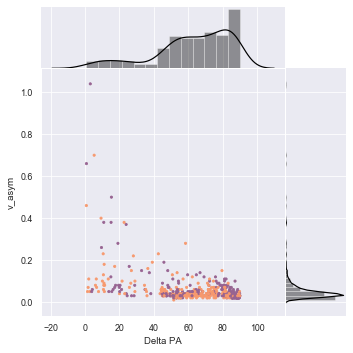

490 490 490


<Figure size 432x288 with 0 Axes>

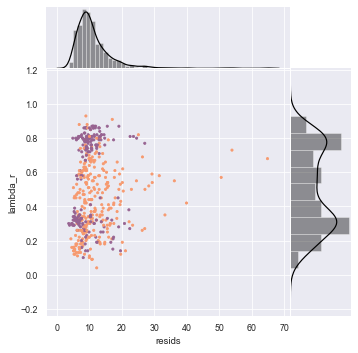

490 490 490


<Figure size 432x288 with 0 Axes>

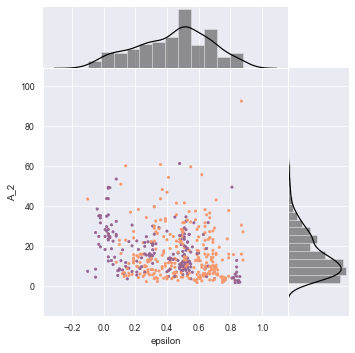

490 490 490


<Figure size 432x288 with 0 Axes>

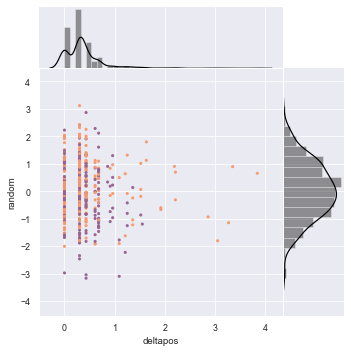

490 490 490


<Figure size 432x288 with 0 Axes>

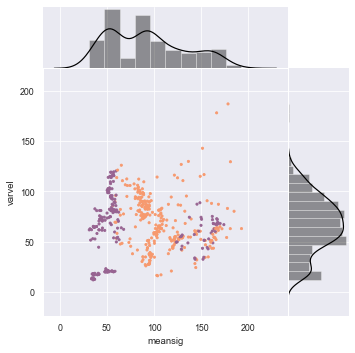

490 490 490


<Figure size 432x288 with 0 Axes>

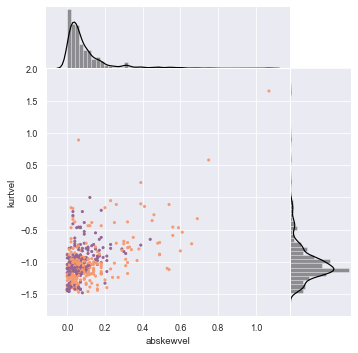

/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 432x288 with 0 Axes>

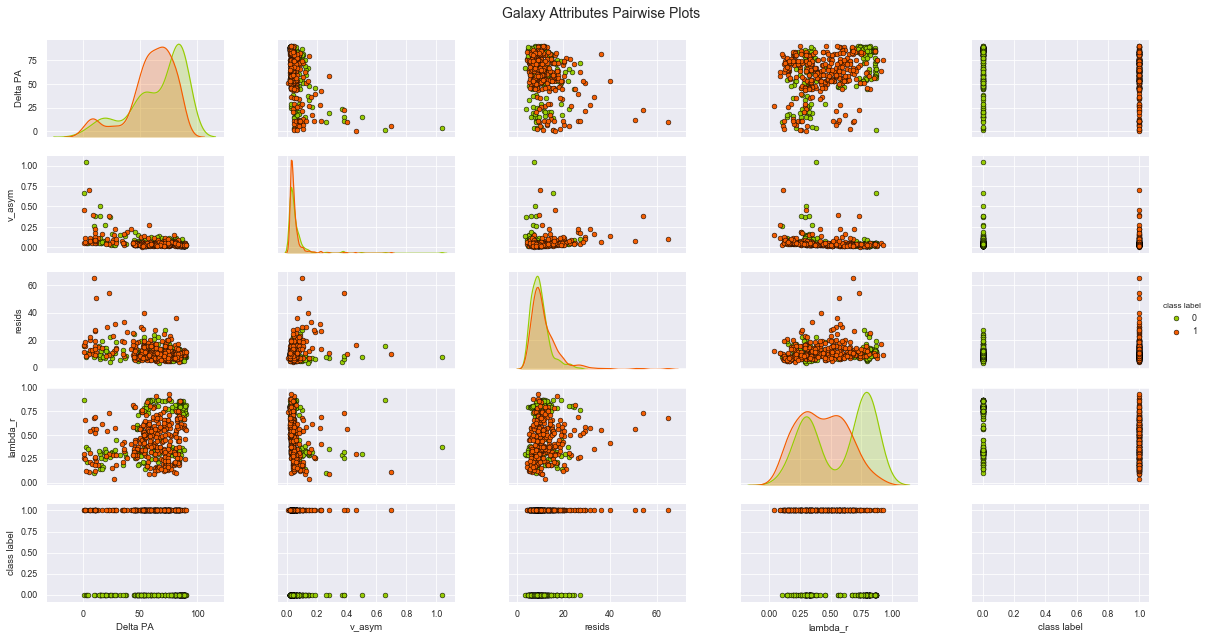

<Figure size 432x288 with 0 Axes>

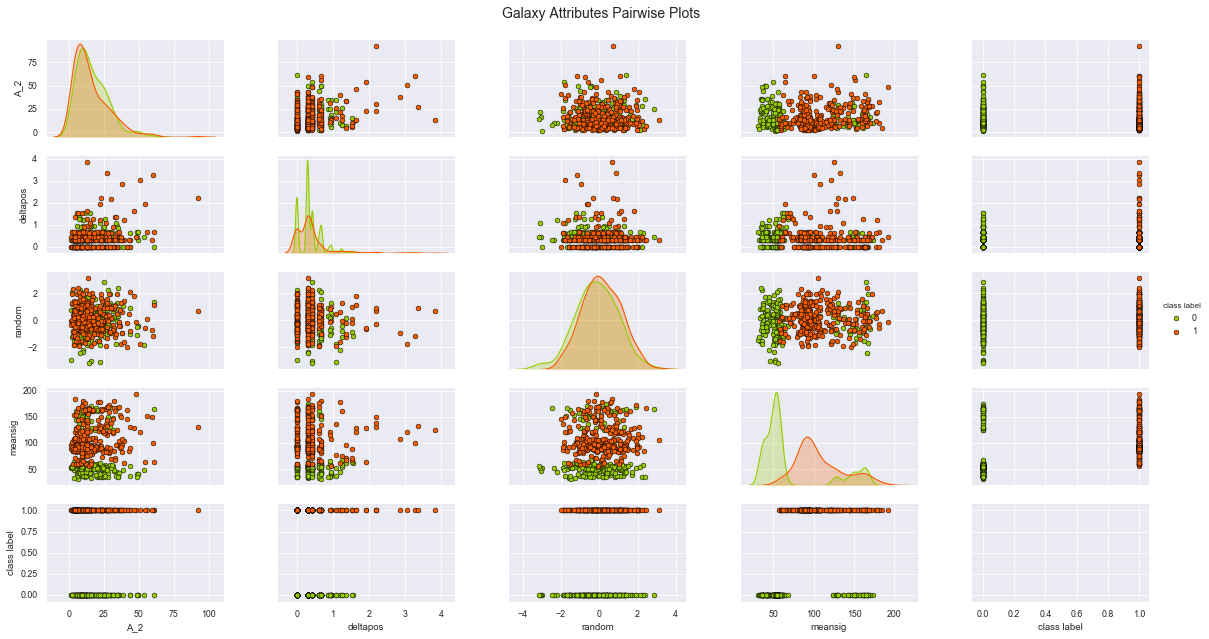

<Figure size 432x288 with 0 Axes>

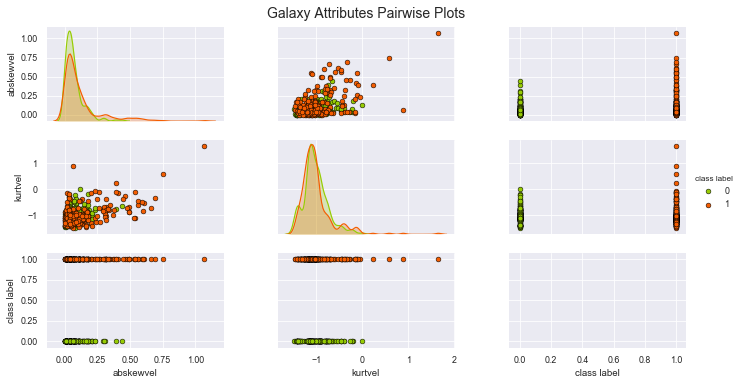

<Figure size 432x288 with 0 Axes>

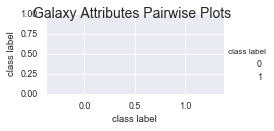

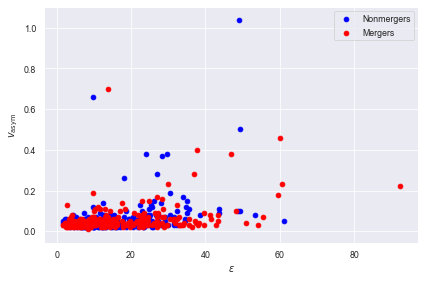

finding test and train indices...
training fold 0
predicting...
[0] 0.0
[0] 0.0
[0] 0.0
[0] 0.7
[1] 1.0
[0] 0.0
[1] 1.0
[1] 1.0
[1] 1.0
[1] 1.0


/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:358: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


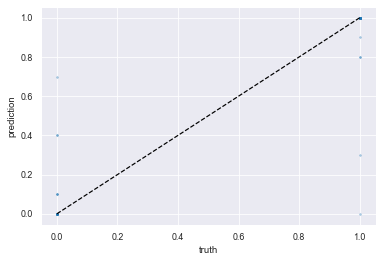

ranking feature importances...


<Figure size 432x288 with 0 Axes>

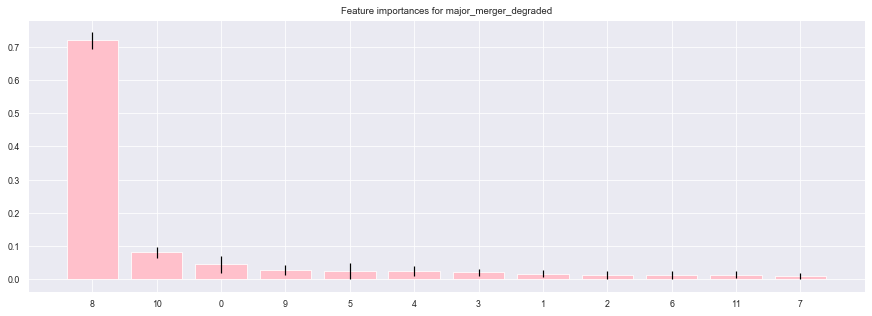

Run  major_merger_degraded
Importance in Order ~~~~
random idx 7
random_value 0.008393539209906223
8 meansig
10 abskewvel
0 Delta PA
9 varvel
5 A_2
4 epsilon
3 lambda_r
1 v_asym
2 resids
6 deltapos
11 kurtvel
7 random
these are the terms you can use ['meansig', 'abskewvel', 'Delta PA', 'varvel', 'A_2', 'epsilon', 'lambda_r', 'v_asym', 'resids', 'deltapos', 'kurtvel', 'random']
m 8.8 8.893171219946131 17


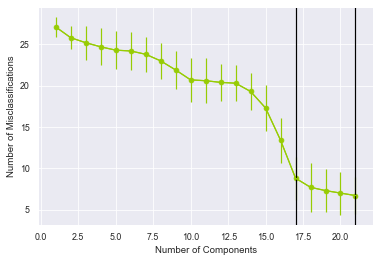

major_merger_degraded &
sorted inputs ['abskewvel*A_2' 'meansig*kurtvel' 'resids*deltapos' 'Delta PA*resids'
 'A_2*random' 'meansig*abskewvel' 'meansig*random' 'abskewvel*varvel'
 'meansig*Delta PA' 'varvel*kurtvel' 'meansig' 'epsilon' 'varvel*epsilon'
 'meansig*varvel' 'meansig*lambda_r' 'varvel' 'lambda_r']
coeff [-0.07202985  0.364939    0.39509024 -0.45970892 -0.48259377  0.52813762
  0.5542798   0.59837784  0.80098172 -2.02629132 -2.18185031  3.27933211
 -4.08642342 -4.70126071  4.96120253  5.43899611 -9.2883251 ]
std [0.07402196 0.17460737 0.10857631 0.06861919 0.07849554 0.12341395
 0.10669428 0.07194278 0.07864338 0.18364572 0.2142523  0.23199593
 0.22725321 0.27874663 0.20373453 0.33792837 0.47358225]
~~~Accuracy~~~
0.8204081632653062
~~~Precision~~~
0.949074074074074
~~~Recall~~~
0.7269503546099291
~~~F1~~~
0.8232931726907631
~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~ Beginning RFR ~~~~~~
['fg3_m10', 'fg3_m15', 'fg3_m15'] [4.01, 0.88, 3.32] [0, 0, 4] ['epsilon', 'epsilon', 'epsilon'] [

/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


271 271 271


<Figure size 432x288 with 0 Axes>

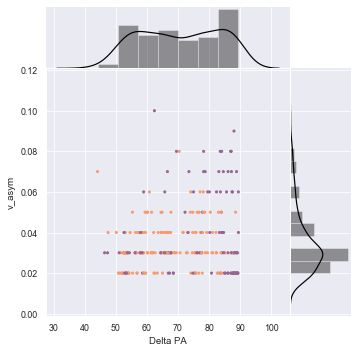

271 271 271


<Figure size 432x288 with 0 Axes>

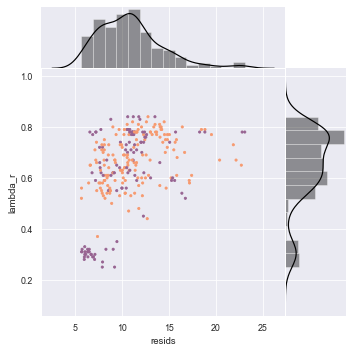

271 271 271


<Figure size 432x288 with 0 Axes>

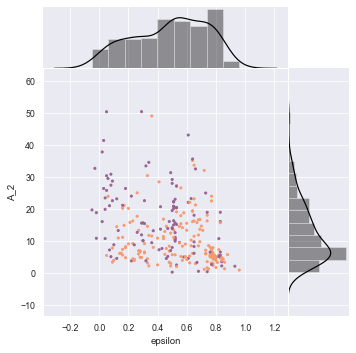

271 271 271


<Figure size 432x288 with 0 Axes>

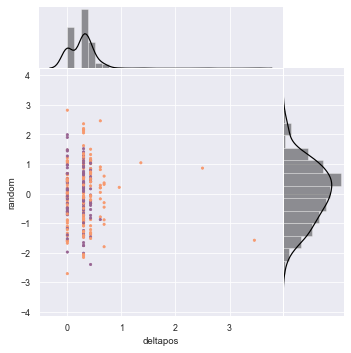

271 271 271


<Figure size 432x288 with 0 Axes>

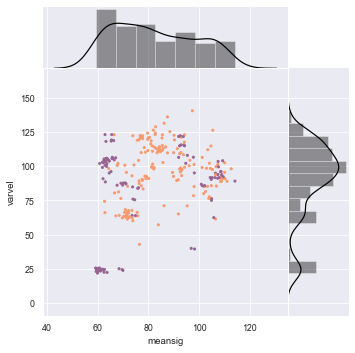

271 271 271


<Figure size 432x288 with 0 Axes>

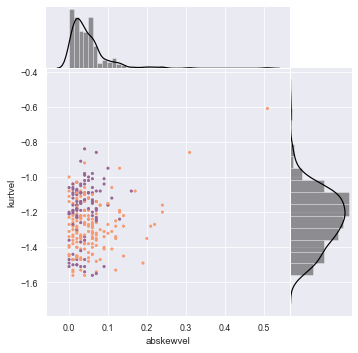

/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/rebeccanevin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 432x288 with 0 Axes>

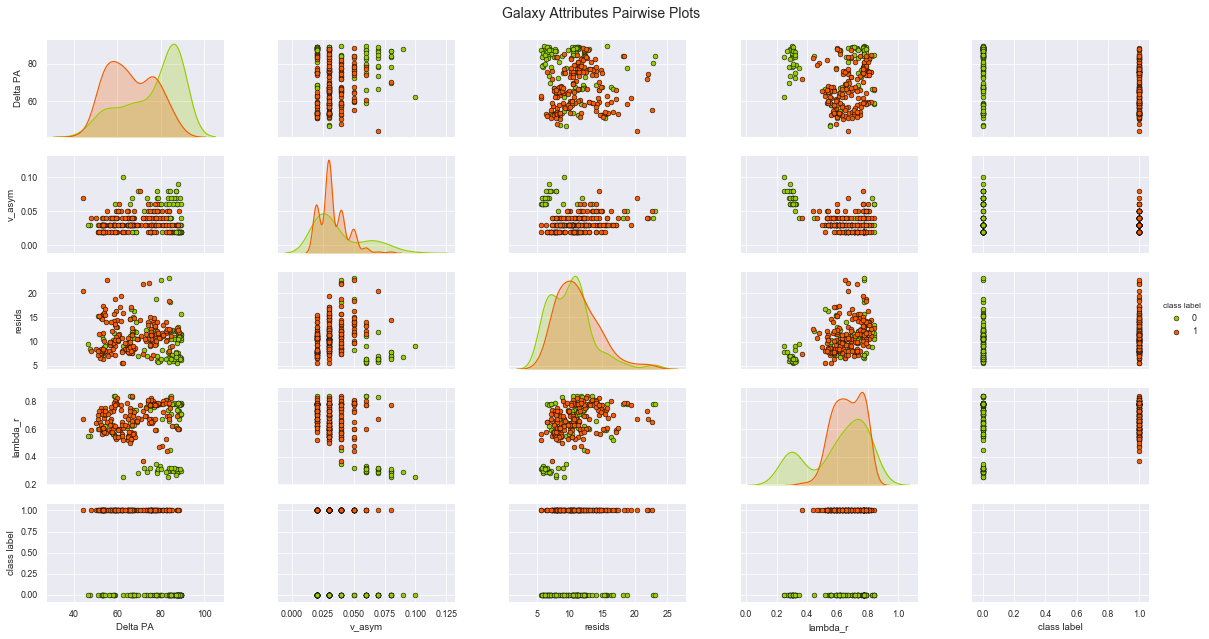

<Figure size 432x288 with 0 Axes>

In [ ]:
unimportant = []
for i in range(len(list_runs)):
    prior = prior_list[i]
    #i = i+4
    run=list_runs[i]
    df_kin = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_kin_rando_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )
    
   
    df_kin.columns = [l for i,l in sorted(feature_dict_kin.items())]# + ['Shape Asymmetry']

    df_kin.dropna(how="all", inplace=True) # to drop the empty line at f
    
    # Okay now load in the imaging version of this same table :)
    df_img = pd.io.parsers.read_csv(filepath_or_buffer='LDA_'+str(run)+'_pre_psf_fix.txt',header=[0],
                                    sep='\t')

    # Not sure why, but I always need to add Shape Assy as a separate column
    df_img.columns = [l for i,l in sorted(feature_dict_img.items())]# + ['Shape Asymmetry']

    df_img.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    #print('df_img', df_img.to_string())
    
    

    # The trick is going to be actually matching between these two tables to create a 'super table'
    # First I think that I need to rename 'image' so that they match table to table
    if run=='fg3_m12_degraded':
        df_img.loc[df_img['Image'].str.contains('q0.5_fg0.3', case=False), 'Image'] = 'fg3_m12'
        df_img.loc[df_img['Image'].str.contains('isolated_galaxies/m1_fg0.3/rot_45', case=False), 'Image'] = 'fg3_m12_iso1_rotated'
        df_img.loc[df_img['Image'].str.contains('isolated_galaxies/m0.5_fg0.3/rot_45', case=False), 'Image'] = 'fg3_m12_iso0.5_rotated'
    if run=='fg3_m13_degraded':
        df_img.loc[df_img['Image'].str.contains('q0.333_fg0.3', case=False), 'Image'] = 'fg3_m13'
        df_img.loc[df_img['Image'].str.contains('isolated_galaxies/m1_fg0.3/rot_45', case=False), 'Image'] = 'fg3_m12_iso1_rotated'
    if run=='fg1_m13_degraded':
        df_img.loc[df_img['Image'].str.contains('q0.333_fg0.1', case=False), 'Image'] = 'fg1_m13'
        df_img.loc[df_img['Image'].str.contains('isolated_galaxies/m0.333_fg0.1/rot_45', case=False), 'Image'] = 'fg1_m13_iso0.333_rotated'
        df_img.loc[df_img['Image'].str.contains('isolated_galaxies/m0.1_fg0.1/rot_45', case=False), 'Image'] = 'fg1_m13_iso1_rotated'
    if run=='fg3_m15_degraded':
        df_img.loc[df_img['Image'].str.contains('q0.2_fg0.3', case=False), 'Image'] = 'fg3_m15'
        df_img.loc[df_img['Image'].str.contains('isolated_galaxies/m1_fg0.3_BT0.2/rot_45', case=False), 'Image'] = 'fg3_m10_iso1_rotated'
    if run=='fg3_m10_degraded':
        df_img.loc[df_img['Image'].str.contains('q0.1_fg0.3', case=False), 'Image'] = 'fg3_m10'
        df_img.loc[df_img['Image'].str.contains('isolated_galaxies/m1_fg0.3_BT0.2/rot_45', case=False), 'Image'] = 'fg3_m10_iso1_rotated'
    if run=='major_merger_degraded':
        df_img.loc[df_img['Image'].str.contains('q0.333_fg0.1', case=False), 'Image'] = 'fg1_m13'
        df_img.loc[df_img['Image'].str.contains('isolated_galaxies/m0.333_fg0.1/rot_45', case=False), 'Image'] = 'fg1_m13_iso0.333_rotated'
        df_img.loc[df_img['Image'].str.contains('isolated_galaxies/m0.1_fg0.1/rot_45', case=False), 'Image'] = 'fg1_m13_iso1_rotated'
        df_img.loc[df_img['Image'].str.contains('q0.333_fg0.3', case=False), 'Image'] = 'fg3_m13'
        df_img.loc[df_img['Image'].str.contains('q0.5_fg0.3', case=False), 'Image'] = 'fg3_m12'
        df_img.loc[df_img['Image'].str.contains('isolated_galaxies/m1_fg0.3/rot_45', case=False), 'Image'] = 'fg3_m12_iso1_rotated'
        df_img.loc[df_img['Image'].str.contains('isolated_galaxies/m0.5_fg0.3/rot_45', case=False), 'Image'] = 'fg3_m12_iso0.5_rotated'
    if run=='minor_merger_degraded':
        df_img.loc[df_img['Image'].str.contains('q0.1_fg0.3', case=False), 'Image'] = 'fg3_m10'
        df_img.loc[df_img['Image'].str.contains('isolated_galaxies/m1_fg0.3_BT0.2/rot_45', case=False), 'Image'] = 'fg3_m10_iso1_rotated'
        df_img.loc[df_img['Image'].str.contains('q0.2_fg0.3', case=False), 'Image'] = 'fg3_m15'
        
    
    
    df_merg = df_img.merge(df_kin, on=['Image', 'class label', 'Myr', 'Viewpoint'])
    #on='ID'
    
    
    
    
    
    # Label the late stages as nonmerging
    for j in range(len(df_merg)):
        if df_merg[['Myr']].values[j][0]<0.39:#df[['Myr']].values[i][0]
            df_merg.at[j,'class label']=0
        if run=='fg3_m12' and (df_merg[['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
            df_merg.at[j,'class label']=0
        if run=='fg1_m13' and (df_merg[['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
            df_merg.at[j,'class label']=0
        if run=='fg3_m13' and (df_merg[['Myr']].values[j][0]-2.59) > 0.5:#2.64+0.5
            df_merg.at[j,'class label']=0
        if run=='fg3_m15' and (df_merg[['Myr']].values[j][0]-3.72) > 0.5:
            df_merg.at[j,'class label']=0
        if run=='fg3_m10' and (df_merg[['Myr']].values[j][0]-9.17) > 0.5:
            df_merg.at[j,'class label']=0
        if run=='major_merger_degraded':
            #then sort by image name
            if df_merg[['Image']].values[j][0][:7]=='fg3_m12' and (df_merg[['Myr']].values[j][0]-2.15) > 0.5:#q0.5_fg0.3
                df_merg.at[j,'class label']=0
            if df_merg[['Image']].values[j][0][:7]=='fg1_m13' and (df_merg[['Myr']].values[j][0]-2.59) > 0.5:
                df_merg.at[j,'class label']=0
            if df_merg[['Image']].values[j][0][:7]=='fg3_m13' and (df_merg[['Myr']].values[j][0]-2.74) > 0.5:
                df_merg.at[j,'class label']=0
        if run=='minor_merger_degraded':
            #then sort by image name
            if df_merg[['Image']].values[j][0][:7]=='fg3_m15' and (df_merg[['Myr']].values[j][0]-3.72) > 0.5:
                df_merg.at[j,'class label']=0
            if df_merg[['Image']].values[j][0][:7]=='fg3_m10' and (df_merg[['Myr']].values[j][0]-9.17) > 0.5:
                df_merg.at[j,'class label']=0
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    #print(df_merg)
    #print(df_merg.columns)
    #print(df_merg.to_string())
    
    
    # Okay now pick out the things you care about and run a RFR to select wich variables are informativo :)
    
    # RFR
    print('~~~~~ Beginning RFR ~~~~~~')
    
  
    
    
    '''Original: ['Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)',
                        'Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A','A_2','deltapos','deltapos2','nspax','re',
        'meanvel','varvel','skewvel','kurtvel',
        'varsig','skewsig','kurtsig','abskewvel','abskewsig','random']'''
    
    
    '''features_list = ['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A_2',
                           'deltapos','deltapos2','meanvel','varvel','kurtvel',
                            'meansig','varsig','kurtsig','abskewvel','abskewsig','random']'''
    
    features_list = ['Delta PA','v_asym', 'resids','lambda_r', 'epsilon','A_2',
                           'deltapos','random', 'meansig', 'varvel', 'abskewvel', 'kurtvel']
    # The first step is actually do go ahead and clean the data
    
    #modify_values()
    
    df_cleaned, run_outlier, myr_outlier, view_outlier, reason_outlier, row_outlier, value_outlier = clean_data(df_merg, 'yes')
    
    #print('what is going on', df_cleaned.to_string())
    
    #run_correlation_analysis(df_merg, features_list)
    
    myr, myr_non, color, color_non, color_all, color_all_non = run_diagnostic_plotting(df_cleaned, features_list, 'yes', 'cut')
    
    
    terms_RFR, reject_terms_RFR = run_RFR(df_cleaned, features_list)
    '''print(terms_RFR)
    
    
    print(run_OLS(df_cleaned,terms_RFR))
    
    print(run_logit(df_cleaned,terms_RFR))
    
  
  
    print(run_LDA_linear(df_cleaned,prior,terms_RFR, myr, myr_non, color, color_non))'''
    
    print('these are the terms you can use', terms_RFR)
    #return std_mean, std_std, selected_features, list_coef[new_min_index], list_inter[new_min_index]
    out_nonlin = run_LDA_nonlinear(df_cleaned,prior,terms_RFR, myr, myr_non, color, color_non, color_all, color_all_non, 20)
    
    continue
    LDA_histogram(df_cleaned, out_nonlin)
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    #run_LDA_linear(df_cleaned,prior,terms_RFR, myr, myr_non, color, color_non)
    
    df_cleaned, run_outlier, myr_outlier, view_outlier, reason_outlier, row_outlier, value_outlier = clean_data(df_merg, 'no')
    
    #print('what is going on', df_cleaned.to_string())
    
    #run_correlation_analysis(df_merg, features_list)
    
    myr, myr_non, color, color_non = run_diagnostic_plotting(df_cleaned, features_list, 'yes', 'nocut')
    
    
    terms_RFR, reject_terms_RFR = run_RFR(df_cleaned, features_list)
    '''print(terms_RFR)
    
    
    print(run_OLS(df_cleaned,terms_RFR))
    
    print(run_logit(df_cleaned,terms_RFR))
    
  
  
    print(run_LDA_linear(df_cleaned,prior,terms_RFR, myr, myr_non, color, color_non))'''
    out_nonlin = run_LDA_nonlinear(df_cleaned,prior,terms_RFR, myr, myr_non, color, color_non)
    
    
    
    
    STOP
    if i > 1:
        STOP
    
   

min and max -43.13849870684552 -26.572451837658498


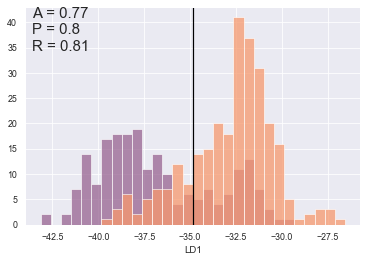

<Figure size 432x288 with 0 Axes>

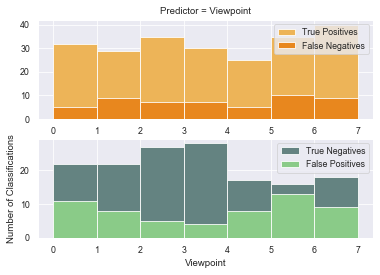

LDA -29.817645101054552
inclination =  0 LDA after -29.817645101054552
inclination =  3 LDA after -29.413100566975615
inclination =  4 LDA after -29.633642614290142
inclination =  5 LDA after -29.65777133859853
inclination =  6 LDA after -29.817645101054552
inclination =  7 LDA after -29.597473891528498
inclination =  8 LDA after -29.757025543597894
inclination =  9 LDA after -29.80665264609758
inclination =  10 LDA after -29.827573770047945
inclination =  20 LDA after -29.807716432061156
inclination =  30 LDA after -29.81870888701813
inclination =  40 LDA after -29.809844003988317
inclination =  45 LDA after -29.837857034362532
inclination =  50 LDA after -29.80878021802474
inclination =  60 LDA after -29.817645101054552
inclination =  70 LDA after -29.80665264609758
inclination =  80 LDA after -29.80665264609758
inclination =  89 LDA after -29.80665264609758


<Figure size 432x288 with 0 Axes>

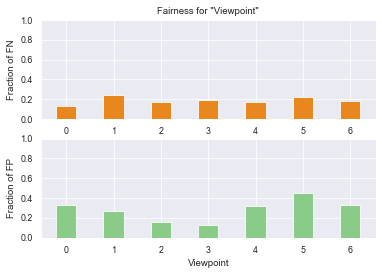

In [45]:
LDA_array, division = LDA_histogram(df_cleaned, out_nonlin)  
num_misclass_fxn_params(df_cleaned, LDA_array, out_nonlin, division, 'Viewpoint') 

#One option would be to feed it a modified df_cleaned array here (for both of these fxns)
#but continue using the division from the first run

# I made a new table that actually has the same snapshot at a variety of inclinations
#LDA_kin_rando_inc_fg3_m12_degraded

'''# Make a mock histo
mock_LDA = []
for j in range(len(df_cleaned)):
#X_in['epsilon'] = 0.3
    try:
        mock_LDA.append(classify_singular(out_nonlin, df_cleaned.loc[j,:]))
    except:
        continue
plt.clf()
plt.hist(mock_LDA, bins = 50)
plt.title('Mock LDA')
plt.show()
STOP'''
 

feature_dict_kin = {i:label for i,label in zip(
                range(29),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                'Delta PA',
                  'v_asym',
                  's_asym',
                  'resids',
                  'lambda_r',
                  'epsilon',
                  'A',
                  'A_2',
                  'deltapos',
                  'deltapos2',
                  'nspax','re',
                  'meanvel','varvel','skewvel','kurtvel',
        'meansig','varsig','skewsig','kurtsig','abskewvel','abskewsig','random','inclination'))}

df_test = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_kin_rando_inc_fg3_m12_degraded.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )
    
   
df_test.columns = [l for i,l in sorted(feature_dict_kin.items())]# + ['Shape Asymmetry']

df_test.dropna(how="all", inplace=True)
def cross_term(row, t1, t2):
        return row[t1]*row[t2]

crossterms = []
ct_1 = []
ct_2 = []
for j in range(len(out_nonlin[2])):
    if '*' in out_nonlin[2][j]:
        crossterms.append(out_nonlin[2][j])
        ct_1.append(out_nonlin[2][j].split('*')[0])
        ct_2.append(out_nonlin[2][j].split('*')[1])

# Okay but now you need to construct the cross terms
for j in range(len(crossterms)):
    df_test[crossterms[j]] = df_test.apply(cross_term, axis=1, args=(ct_1[j], ct_2[j]))
      

#print(df_test)
X_in = df_test.loc[0,:]
print('LDA', classify_singular( out_nonlin, X_in))
for j in range(len(df_test)):
#X_in['epsilon'] = 0.3
    print('inclination = ',df_test.loc[j,:]['inclination'],
          'LDA after', classify_singular(out_nonlin, df_test.loc[j,:]))
 

In [42]:
def assess(nonmerg, merg, division):
    #A = (TP + TN)/ (all)
    #P = (TP)/(TP+FP)
    #R = (TP)/ (TP + FN)
    TP = len([i for i in merg if i > division]) 
    FN = len([i for i in merg if i < division])
    TN = len([i for i in nonmerg if i < division])
    FP = len([i for i in nonmerg if i > division])
    #print(TP + FN + TN + FP, nonmerg+merg)
    return (TP + TN)/(TP + TN + FP + FN), TP/(TP+FP), TP/(TP+FN)


def classify_singular(out_nonlin, X):
    X_std = (X[out_nonlin[2]] - out_nonlin[0])/out_nonlin[1]

    
    
    LDA_val = np.sum(X_std*out_nonlin[3][0]+out_nonlin[4][0])
    '''print('these are the contributing terms', X_std*out_nonlin[3][0])
    print('these are the accompanying coeff', out_nonlin[2])'''
    return LDA_val

def LDA_histogram(df_cleaned, out_nonlin):
    X_std = (df_cleaned[out_nonlin[2]] - out_nonlin[0])/out_nonlin[1]

    

    LDA_array = np.sum(X_std*out_nonlin[3][0]+out_nonlin[4][0], axis=1)
    # Now divide them up
    
    LDA_nonmerg = []
    LDA_merg = []
    for j in range(len(df_cleaned)):
        try:
            fill = LDA_array[j]
        except:
            continue
        if df_cleaned[['class label']].values[j,0]==0:
            LDA_nonmerg.append(fill)
        else:
            LDA_merg.append(fill)
    
    # Now, can I also print on this plot accuracy and precision
    A, P, R = assess(LDA_nonmerg, LDA_merg, (np.mean(LDA_nonmerg)+np.mean(LDA_merg))/2)

    plt.clf()
    print('min and max', np.min(LDA_nonmerg), np.max(LDA_merg))
    ybins, xbins = np.histogram(LDA_merg, bins=30, range = [np.min(LDA_nonmerg), np.max(LDA_merg)])


    plt.hist(LDA_nonmerg, bins=xbins, alpha=0.75, color='#976391', label='Nonmergers')
    plt.hist(LDA_merg, bins=xbins, alpha=0.75, color='#F7996E', label='Mergers')
    plt.axvline(x = (np.mean(LDA_nonmerg)+np.mean(LDA_merg))/2, color='k')
    plt.annotate('A = '+str(round(A,2))+'\n'+'P = '+str(round(P,2))+'\n'+'R = '+str(round(R,2)), 
                 xy=(0.02,0.8), xycoords='axes fraction', size=15)
    plt.xlabel('LD1')
    plt.show()
    
    return LDA_array, (np.mean(LDA_nonmerg)+np.mean(LDA_merg))/2
    
def num_misclass_fxn_params(df_cleaned, LDA_array, out_nonlin, division, param):   
    
    LDA_nonmerg = []
    LDA_merg = []
    LDA_nonmerg_inc = []
    LDA_merg_inc = []
    
    TP = []
    FP = []
    TN = []
    FN = []
    
   
    for j in range(len(df_cleaned)):
        
        try:
            fill = LDA_array[j]
        except:
            continue
        if df_cleaned[['class label']].values[j,0]==0:
            LDA_nonmerg.append(fill)
            
            if fill < division:
                TN.append(df_cleaned[[param]].values[j,0])
            else:
                FP.append(df_cleaned[[param]].values[j,0])
            
        else:
            LDA_merg.append(fill)
            
            if fill > division:
                TP.append(df_cleaned[[param]].values[j,0])
            else:
                FN.append(df_cleaned[[param]].values[j,0])
    plt.clf()
    if param == 'Viewpoint':
        xbin = [0,1,2,3,4,5,6,7]
    else:
        ybin, xbin = np.histogram(TP, bins=20,range = [np.min([np.min(TP),np.min(TN),np.min(FN),np.min(FP)]), 
                                                      np.max([np.max(TP),np.max(TN),np.max(FN),np.max(FP)])])
    fig = plt.figure()
    ax0 = fig.add_subplot(211)
    ax0.set_title('Predictor = '+str(param))
    ax0.hist(TP, bins = xbin , alpha = 1, color = '#EDB458', label='True Positives')
    ax0.hist(FN, bins = xbin, alpha = 1, color = '#E8871E', label='False Negatives')
    plt.legend()
    ax1 = fig.add_subplot(212)
    ax1.hist(TN, bins = xbin, alpha = 1, color = '#648381', label='True Negatives')
    ax1.hist(FP, bins = xbin , alpha = 1, color = '#8ACB88',label='False Positives')
    ax1.set_ylabel('Number of Classifications')
    ax1.set_xlabel(str(param))
    plt.legend()
    plt.show()
    
    sns.set_context("paper")
    plt.clf()
    fig = plt.figure()
    ax0 = fig.add_subplot(211)
    ax0.set_title('Fairness for "'+str(param)+'"')
    
    
    yFN, xbins = np.histogram(FN, bins = xbin)
    yTP, xbins = np.histogram(TP, bins = xbin)
    
    
    x_here = xbin[:-1]
    
    
    width = [0.5*(x_here[-1] - x_here[0])/len(x_here) for x in x_here]
    clean_divided = []
    for j in range(len(yFN)):
        clean_divided.append(yFN[j]/(yTP[j]+yFN[j]))
        
    
    #ax0.hist(TP, bins = xbin , alpha = 1, color = '#EDB458', label='True Positives', density=True)
    #ax0.hist(FN, bins = xbin, alpha = 1, color = '#E8871E')
    ax0.bar(x_here, clean_divided, width = width,color = '#E8871E')
    
    
    
    
    yFP, xbins = np.histogram(FP, bins = xbin)
    yTN, xbins = np.histogram(TN, bins = xbin)
    
    
    
    
    clean_divided = []
    for j in range(len(yTN)):
        clean_divided.append(yFP[j]/(yTN[j]+yFP[j]))
    
    ax1 = fig.add_subplot(212)
    #ax1.set_title('No edge-on nonmergers')
    #ax1.hist(TN, bins = xbin, alpha = 1, color = '#648381', label='True Negatives', density=True)
    #ax1.hist(, bins = xbin , alpha = 1, color = '#8ACB88',label='False Positives', density=True)
    ax1.bar(x_here, clean_divided, width = width, color = '#8ACB88')
    ax1.set_ylim([0,1])
    ax0.set_ylim([0,1])
    ax1.set_xlabel(str(param))
    ax1.set_ylabel('Fraction of FP')
    ax0.set_ylabel('Fraction of FN')
    #plt.legend()
    #plt.show()
    #plt.tight_layout()
    plt.savefig(str(param)+'_fairness.png', dpi=500)
    

In [43]:
# Can you do something like a likelihood of missclassification as a fxn of ellipticity?
